# UK Used Car Data set

- year (Año del vehículo)
- price (Precio del vehículo)
- mileage (Kilometraje)
- tax (Impuestos del vehículo) : La cantidad que se paga como impuesto anual por el vehículo.
- mpg (Rendimiento en millas por galón) : Valores altos indican que el vehículo consume menos combustible por distancia recorrida.
- engineSize (Tamaño del motor)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
    # 1. Cargar el dataset
    df = pd.read_csv("./datasets/focus.csv")  # Cambia por la ruta correspondiente

In [4]:
df

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


In [8]:
df["transmission"].value_counts()

transmission
Manual       4664
Automatic     635
Semi-Auto     155
Name: count, dtype: int64

In [9]:
# 2. Generar variables dummies para la columna 'transmission'
df_dummies = pd.get_dummies(df, columns=['transmission'])

df_dummies

,model,year,price,mileage,fuelType,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,Focus,2016,8000,38852,Petrol,1.0,False,True,False
1,Focus,2019,13400,11952,Petrol,1.0,False,True,False
2,Focus,2019,14600,22142,Petrol,1.5,False,True,False
3,Focus,2016,9450,14549,Diesel,1.6,False,True,False
4,Focus,2015,9999,7010,Diesel,1.6,False,True,False
...,...,...,...,...,...,...,...,...,...
5449,Focus,2019,18745,7855,Diesel,2.0,False,True,False
5450,Focus,2019,16350,13891,Petrol,1.0,False,True,False
5451,Focus,2019,16850,13452,Petrol,1.0,False,True,False
5452,Focus,2019,17310,13376,Petrol,1.0,True,False,False


In [10]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   5454 non-null   object 
 1   year                    5454 non-null   int64  
 2   price                   5454 non-null   int64  
 3   mileage                 5454 non-null   int64  
 4   fuelType                5454 non-null   object 
 5   engineSize              5454 non-null   float64
 6   transmission_Automatic  5454 non-null   bool   
 7   transmission_Manual     5454 non-null   bool   
 8   transmission_Semi-Auto  5454 non-null   bool   
dtypes: bool(3), float64(1), int64(3), object(2)
memory usage: 271.8+ KB


In [11]:
# Convertir las columnas dummies a tipo numérico (0 y 1)
for col in df_dummies.columns:
    if df_dummies[col].dtype == 'bool':  # Detectar columnas booleanas
        df_dummies[col] = df_dummies[col].astype(int)  # Convertir a entero (0/1)

In [12]:
#confirmo si se ha hecho el cambio
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   5454 non-null   object 
 1   year                    5454 non-null   int64  
 2   price                   5454 non-null   int64  
 3   mileage                 5454 non-null   int64  
 4   fuelType                5454 non-null   object 
 5   engineSize              5454 non-null   float64
 6   transmission_Automatic  5454 non-null   int64  
 7   transmission_Manual     5454 non-null   int64  
 8   transmission_Semi-Auto  5454 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 383.6+ KB


In [13]:
# 3. Seleccionar columnas numéricas
# Seleccionamos solo las columnas numéricas
numeric_cols = df_dummies.select_dtypes(include=["float64", "int64"]).columns
numeric_cols 

Index(['year', 'price', 'mileage', 'engineSize', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

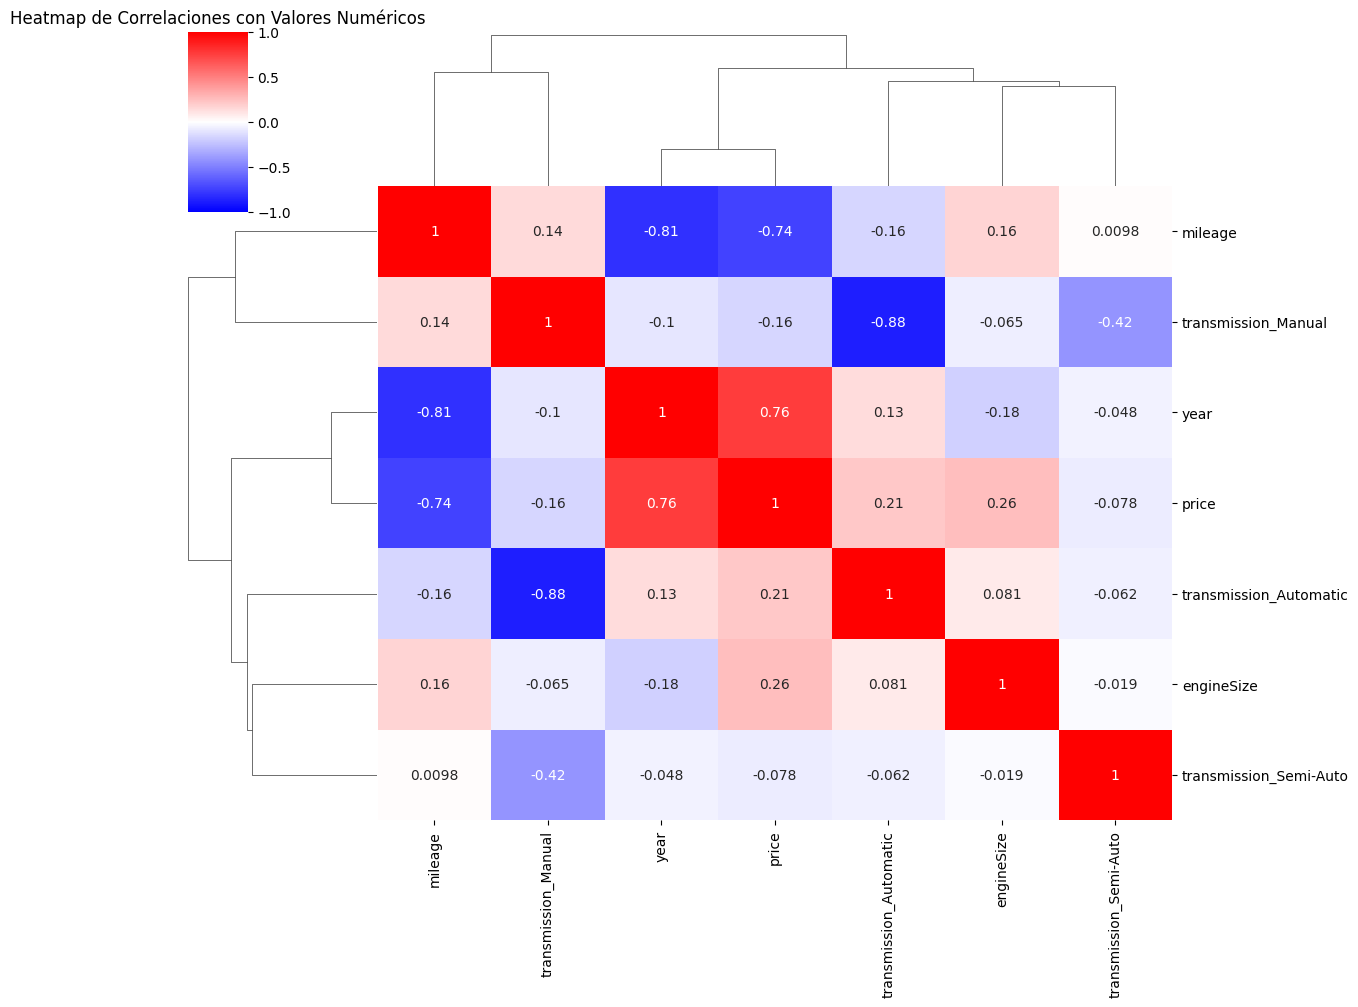

In [14]:
# Crear un heatmap de correlación
plt.figure(figsize=(10, 8))
sns.clustermap(df_dummies[numeric_cols].corr(), annot=True, cmap="bwr", vmin=-1, vmax=1, figsize=(12, 10))
plt.title("Heatmap de Correlaciones con Valores Numéricos")
plt.show()

- mileage y year:
    -Correlación negativa fuerte (~ -0.81). Vehículos más nuevos (year más alto) tienden a tener menos kilometraje (mileage más bajo).


- price y year:
    - Correlación positiva moderada (~ 0.76). Vehículos más nuevos tienden a ser más caros.


- transmission_Manual y transmission_Automatic:
    - Correlación negativa fuerte (~ -0.88). Esto es esperado, ya que son categorías excluyentes (un vehículo no puede ser manual y automático a la vez).

- engineSize:
    - Baja correlación con otras variables. Esto sugiere que el tamaño del motor tiene un comportamiento independiente respecto a las otras características.


- price y mileage:
    - Correlación negativa moderada (~ -0.74). Vehículos con mayor kilometraje tienden a tener precios más bajos.


In [16]:
# 4. Escalar las variables seleccionadas.Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies[numeric_cols])

In [18]:
# Mostrar los datos normalizados
print("\nDatos normalizados (primeras filas):")
print(X_scaled[:5])


Datos normalizados (primeras filas):
[[-0.51310715 -1.17841185  0.77569901 -0.90769543 -0.36300148  0.41156106
  -0.17102866]
 [ 0.86931657 -0.03841338 -0.53045175 -0.90769543 -0.36300148  0.41156106
  -0.17102866]
 [ 0.86931657  0.21491961 -0.03566824  0.34169153 -0.36300148  0.41156106
  -0.17102866]
 [-0.51310715 -0.87230115 -0.40435236  0.59156892 -0.36300148  0.41156106
  -0.17102866]
 [-0.97391506 -0.75640131 -0.77041446  0.59156892 -0.36300148  0.41156106
  -0.17102866]]


In [19]:
X_scaled.shape

(5454, 7)

In [20]:
X_scaled.shape[1]

7

In [22]:
# 5. Aplicar PCA
pca = PCA(n_components=X_scaled.shape[1])  # Mantener todas las componentes
X_pca = pca.fit_transform(X_scaled)

In [23]:
X_pca

array([[ 1.52174779e+00,  1.37136854e-01, -7.91878837e-01, ...,
         1.49518974e-01, -1.11911333e-01, -2.63259953e-16],
       [-4.92223968e-01,  1.00431176e+00, -8.50861359e-01, ...,
         1.59829994e-01, -2.60150758e-01, -1.24482075e-16],
       [-3.58650741e-01,  7.47063818e-01,  2.81993367e-01, ...,
         4.93899992e-01, -4.20841595e-01,  1.25318106e-16],
       ...,
       [-8.36305423e-01,  1.11280568e+00, -6.40943656e-01, ...,
         3.39019784e-01,  2.95849989e-01,  1.04125210e-15],
       [-2.62625517e+00, -2.42946045e+00, -4.75613165e-01, ...,
         4.01750756e-01,  2.87675438e-01, -3.18453429e-15],
       [-2.80032077e+00, -2.35692743e+00, -4.96182518e-01, ...,
         2.05504399e-01,  2.79113900e-01, -3.40657889e-15]])

In [24]:
# 6. Visualización de los pesos
loadings_PCA = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=[f'PCA{i+1}' for i in range(X_scaled.shape[1])]
)

print("\nPesos de las variables originales en las componentes principales:")
loadings_PCA


Pesos de las variables originales en las componentes principales:


,year,price,mileage,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
PCA1,-5.246582e-01,-5.252430e-01,5.281899e-01,4.238051e-03,-0.300569,0.281514,-0.016094
PCA2,2.669244e-01,1.720834e-01,-2.312118e-01,-1.492273e-01,-0.549727,0.649654,-0.314897
PCA3,-1.341994e-01,2.739910e-01,1.422587e-01,7.948350e-01,0.136211,0.100457,-0.475683
PCA4,9.455181e-03,1.992892e-01,-3.673964e-02,4.578014e-01,-0.428987,0.036398,0.750938
PCA5,6.019564e-01,1.684072e-01,7.761981e-01,-7.415087e-02,0.001039,-0.016190,0.032287
PCA6,-5.225273e-01,7.425354e-01,2.085323e-01,-3.617597e-01,-0.020573,0.005410,0.028251
PCA7,-2.627825e-16,1.482824e-15,9.048124e-16,-4.764896e-16,0.635965,0.697847,0.329481


In [25]:
loadings = pd.DataFrame(
    pca.components_,
    columns=numeric_cols
)

print("\nPesos de las variables originales en las componentes principales:")
loadings


Pesos de las variables originales en las componentes principales:


,year,price,mileage,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,-5.246582e-01,-5.252430e-01,5.281899e-01,4.238051e-03,-0.300569,0.281514,-0.016094
1,2.669244e-01,1.720834e-01,-2.312118e-01,-1.492273e-01,-0.549727,0.649654,-0.314897
2,-1.341994e-01,2.739910e-01,1.422587e-01,7.948350e-01,0.136211,0.100457,-0.475683
3,9.455181e-03,1.992892e-01,-3.673964e-02,4.578014e-01,-0.428987,0.036398,0.750938
4,6.019564e-01,1.684072e-01,7.761981e-01,-7.415087e-02,0.001039,-0.016190,0.032287
5,-5.225273e-01,7.425354e-01,2.085323e-01,-3.617597e-01,-0.020573,0.005410,0.028251
6,-2.627825e-16,1.482824e-15,9.048124e-16,-4.764896e-16,0.635965,0.697847,0.329481


# **Interpretación de los pesos de las variables originales en las componentes principales**

Cada fila corresponde a una **componente principal (PCA)** y cada columna muestra el peso (*loading*) de una variable original en esa componente. Los pesos indican qué tan importante es cada variable para esa componente y si su influencia es positiva o negativa.

---

## **Análisis de cada componente**

### **PCA1 (Primera componente principal)**
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **-0.524658**  | Vehículos más antiguos tienen valores más altos en PCA1.   |
| `price`                  | **-0.525243**  | Vehículos más baratos también tienen valores altos.         |
| `mileage`                | **0.528190**   | Vehículos con mayor kilometraje están positivamente correlacionados. |
| `engineSize`             | **0.004238**   | Contribución insignificante del tamaño del motor.          |
| `transmission_Automatic` | **-0.300569**  | Transmisión automática contribuye negativamente.           |
| `transmission_Manual`    | **0.281514**   | Transmisión manual contribuye positivamente.               |
| `transmission_Semi-Auto` | **-0.016094**  | Transmisión semi-automática tiene muy poca influencia.      |

**Interpretación**:  
PCA1 parece capturar una combinación de **antigüedad, precio y kilometraje**:  
- **Vehículos más antiguos, más baratos y con mayor kilometraje** tienen valores más altos en PCA1.
- Las transmisiones juegan un papel menor, pero los vehículos manuales tienen una ligera correlación positiva.

---

### **PCA2 (Segunda componente principal)**
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **0.266924**   | Vehículos más nuevos contribuyen ligeramente a PCA2.       |
| `price`                  | **0.172083**   | Precio tiene una pequeña influencia positiva.              |
| `mileage`                | **-0.231212**  | Vehículos con menos kilometraje tienen valores más altos.  |
| `engineSize`             | **-0.149227**  | Tamaño del motor contribuye negativamente.                 |
| `transmission_Automatic` | **-0.549727**  | Transmisión automática reduce los valores en PCA2.         |
| `transmission_Manual`    | **0.649654**   | Transmisión manual aumenta los valores en PCA2.            |
| `transmission_Semi-Auto` | **-0.314897**  | Transmisión semi-automática tiene una influencia negativa. |

**Interpretación**:  
PCA2 parece capturar principalmente la **diferencia entre transmisiones**:  


---

### **PCA3 (Tercera componente principal)**
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **-0.134199**  | Año contribuye ligeramente de forma negativa.              |
| `price`                  | **0.273991**   | Precio tiene una influencia moderada positiva.             |
| `mileage`                | **0.142259**   | Kilometraje contribuye positivamente.                      |
| `engineSize`             | **0.794835**   | Tamaño del motor domina esta componente.                   |
| `transmission_Automatic` | **0.136211**   | Transmisión automática tiene una influencia pequeña.        |
| `transmission_Manual`    | **0.100457**   | Transmisión manual tiene una influencia mínima.            |
| `transmission_Semi-Auto` | **-0.475683**  | Transmisión semi-automática tiene un peso moderado negativo.|

**Interpretación**:  
PCA3 está dominada por el **tamaño del motor (`engineSize`)**:  
- Vehículos con motores más grandes tienen valores altos en PCA3.

---

### **PCA4 (Cuarta componente principal)**
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **0.009455**   | Año tiene una contribución mínima.                         |
| `price`                  | **0.199289**   | Precio tiene una influencia pequeña positiva.              |
| `mileage`                | **-0.036740**  | Kilometraje tiene una influencia insignificante.           |
| `engineSize`             | **0.457801**   | Tamaño del motor contribuye moderadamente.                 |
| `transmission_Automatic` | **-0.428987**  | Transmisión automática tiene una influencia negativa.       |
| `transmission_Manual`    | **0.036398**   | Transmisión manual tiene una influencia insignificante.     |
| `transmission_Semi-Auto` | **0.750938**   | Transmisión semi-automática domina esta componente.         |

**Interpretación**:  
PCA4 está dominada por **transmisión semi-automática** y también influye el **tamaño del motor**.

---

### **PCA5 y PCA6**
- **PCA5**:  
  Está dominada por **kilometraje (`mileage`, 0.776198)** y **año (`year`, 0.601956)**.  
  Representa un eje relacionado con **antigüedad y uso** del vehículo.

- **PCA6**:  
  Está dominada por **precio (`price`, 0.742535)** y **kilometraje (`mileage`, 0.208532)**.  
  Representa información residual.



Los pesos en  **PCA7** muestran valores pequeños en las variables originales. Sin embargo, los pesos son altos en las categorías de transmisión (`transmission_Automatic`, `transmission_Manual`, y `transmission_Semi-Auto`), indicando que esta componente captura exclusivamente las diferencias entre tipos de transmisión, aunque con menos relevancia.

---
1. **PCA1**:
   - Captura una combinación de características relacionadas con **estado general** del vehículo: precio, kilometraje y año.
2. **PCA2**:
   - Está dominada por el **tipo de transmisión**.
3. **PCA3**:
   - Representa principalmente el **tamaño del motor**.
4. **PCA4**:
   - Está relacionada con **transmisión semi-automática** y el tamaño del motor.
5. **PCA5** y **PCA6**:
   - Capturan información residual sobre kilometraje y año.



In [26]:
# 6. Visualizar varianza explicada

# PCA1: 0.4294 → 42.94% de la varianza total.
# La primera componente principal explica la mayor parte de la variabilidad en los datos.

# PCA2: 0.2352 → 23.52% de la varianza total.
# La segunda componente principal explica una parte significativa, pero menor que la primera.

# PCA3: 0.1911 → 19.11% de la varianza total.
# La tercera componente sigue aportando información relevante.

#PCA4: 0.0918 → 9.18% de la varianza total.
#La cuarta componente aporta algo de información, pero mucho menos que las primeras tres.

#PCA5: 0.0323 → 3.23% de la varianza total.
#La quinta componente captura muy poca información.

#PCA6: 0.0202 → 2.02% de la varianza total.
#La última componente aporta información mínima y podría considerarse ruido.

explained_variance_ratio = pca.explained_variance_ratio_   #Cada componente principal captura una parte de la variabilidad de los datos, la información de los datos.

explained_variance_ratio


array([0.38679181, 0.26141311, 0.16653024, 0.14029059, 0.02765321,
       0.01732104, 0.        ])

In [27]:
len(explained_variance_ratio)

7

In [28]:
explained_variance_ratio.cumsum()  # es un método de NumPy o pandas que devuelve la suma acumulada de un array o columna. 

array([0.38679181, 0.64820492, 0.81473516, 0.95502575, 0.98267896,
       1.        , 1.        ])

In [29]:
enumerate(explained_variance_ratio.cumsum())

In [30]:
# Resumen de varianza explicada
print("\nVarianza explicada acumulada:")
for i, var in enumerate(explained_variance_ratio.cumsum()):
    print(f"PCA{i+1}: {var:.2%}")


Varianza explicada acumulada:
PCA1: 38.68%
PCA2: 64.82%
PCA3: 81.47%
PCA4: 95.50%
PCA5: 98.27%
PCA6: 100.00%
PCA7: 100.00%


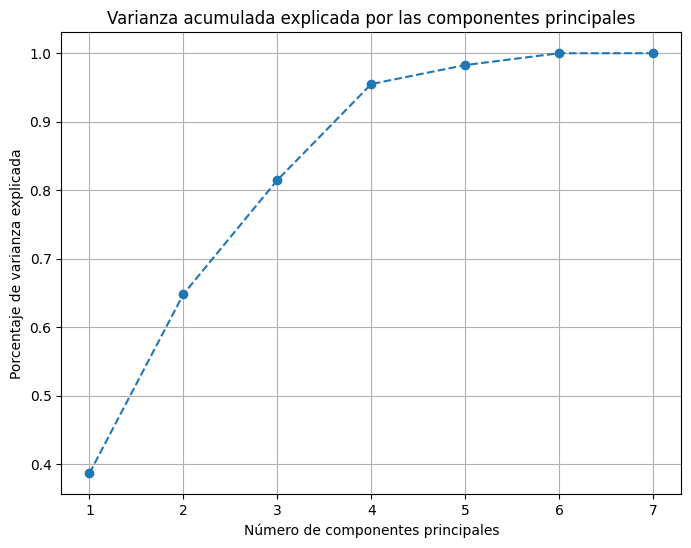

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por las componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid()
plt.show()



### ¿Qué representa el gráfico?

El eje X: Representa el número de componentes principales seleccionados.

El eje Y: Muestra el porcentaje acumulado de la varianza explicada por las componentes seleccionadas.

El gráfico indica cómo las componentes principales van capturando progresivamente más información de los datos originales.

### PCA1 (Primera componente principal):

Explica aproximadamente el 40% de la varianza total (0.4 en el eje Y).
Esta es la componente que captura la mayor cantidad de información de los datos originales.


### PCA1 + PCA2 (Primeras dos componentes principales):

Juntas explican más del 70% de la varianza total.

Esto significa que estas dos componentes ya resumen una gran parte de la información.


### PCA1 + PCA2 + PCA3 (Primeras tres componentes principales):

Acumulan cerca del 85% de la varianza.
Es un buen equilibrio entre reducción de dimensionalidad y retención de información.


### PCA1 + PCA2 + PCA3 + PCA4 (Primeras cuatro componentes principales):

Explican más del 90% de la varianza total.
A partir de este punto, las siguientes componentes explican pequeñas cantidades de varianza adicional.


### Componentes posteriores (PCA5 en adelante):

La curva se aplana a partir de aquí.
Esto indica que las componentes adicionales aportan muy poca información nueva, y podrían no ser necesarias para el análisis.

### ¿Cuántas componentes principales deberíamos usar?

Generalmente, elegimos el número de componentes que expliquen entre el 90% y 95% de la varianza.

En este caso, con 4 componentes principales, explicamos aproximadamente el 90% de la varianza, lo cual es suficiente para conservar la mayor parte de la información.

In [127]:
# Elegir el número de componentes principales 
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Mostrar los datos comprimidos
print("\nDatos comprimidos (primeras filas):")
print(X_pca[:5])


Datos comprimidos (primeras filas):
[[ 1.52174779  0.13713685 -0.79187884 -0.64146845]
 [-0.49222397  1.00431176 -0.85086136 -0.35322044]
 [-0.35865074  0.74706382  0.28199337  0.25105901]
 [ 0.74402805  0.23892406  0.31578794  0.14925607]
 [ 0.7315688   0.22050548  0.35730807  0.18144564]]


In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clústeres como una nueva columna en el dataset original
df["Cluster"] = clusters

# Mostrar algunas filas con el clúster asignado
print("\nDataset con clústeres asignados:")
print(df.head())


Dataset con clústeres asignados:
    model  year  price transmission  mileage fuelType  engineSize  Cluster
0   Focus  2016   8000       Manual    38852   Petrol         1.0        0
1   Focus  2019  13400       Manual    11952   Petrol         1.0        0
2   Focus  2019  14600       Manual    22142   Petrol         1.5        0
3   Focus  2016   9450       Manual    14549   Diesel         1.6        0
4   Focus  2015   9999       Manual     7010   Diesel         1.6        0


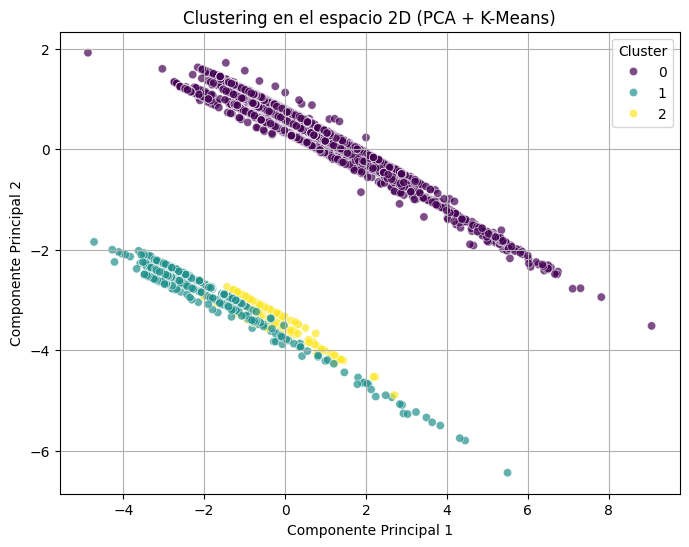

In [33]:
# Visualizar los datos comprimidos en 2D junto con los clústeres
plt.figure(figsize=(8, 6))

# Graficar los datos usando las primeras dos componentes principales
sns.scatterplot(
    x=X_pca[:, 0],  # Primera componente principal
    y=X_pca[:, 1],  # Segunda componente principal
    hue=df["Cluster"],  # Clúster asignado como color
    palette="viridis",  # Paleta de colores
    alpha=0.7  # Transparencia
)

# Etiquetas y título
plt.title("Clustering en el espacio 2D (PCA + K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


Los datos se agrupan en tres clústeres bien definidos, lo que indica que K-Means ha identificado patrones en los datos.